<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/HW5_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cvxpy as cvx
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
(m,n) = (100,30)
A = np.random.rand(m,n)
b = np.random.rand(m,1)

In [ ]:
def check_optimality(A,b,r):
    At = A.T
    grad = np.zeros((At.shape[0],1))
    for i in range(m):
        coef = np.sign(r[i]) * np.abs(r[i])**0.5
        grad += coef * At[:,i:i+1]
    print('max_norm(grad):')
    print(np.linalg.norm(grad,np.inf))

def explain_result(problem_name,optimal_value,residuals):
    h = sns.histplot(data=residuals,legend=False,bins=10)
    h.set_title(problem_name)
    h.set_xlabel("residual")
    plt.show()
    print(f"{problem_name} optimal_value:")
    print(optimal_value)

Solving norm approximation problem using L-1.5 norm




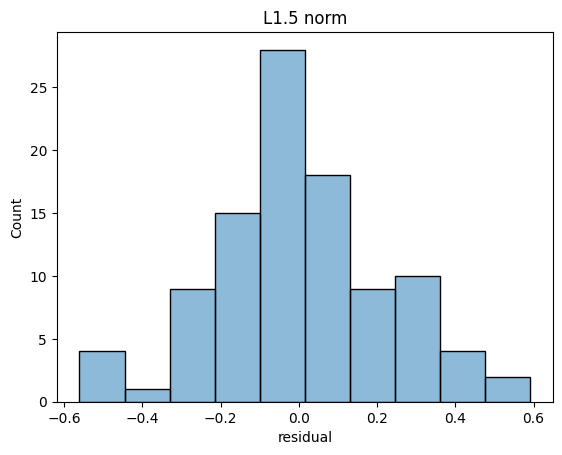

L1.5 norm optimal_value:
8.63742664494257
max_norm(grad):
3.0659133071264666e-05


In [ ]:
x = cvx.Variable((n,1))
r = cvx.Variable((m,1))
summation = cvx.sum(cvx.power(cvx.abs(r),1.5))
objective = cvx.Minimize(summation)
constraints = [A@x-b==r]
problem = cvx.Problem(objective,constraints)
problem.solve()
explain_result(f"L{1.5} norm",problem.value,r.value)
check_optimality(A,b,r.value)

Solving norm approximation problem using L-1 norm

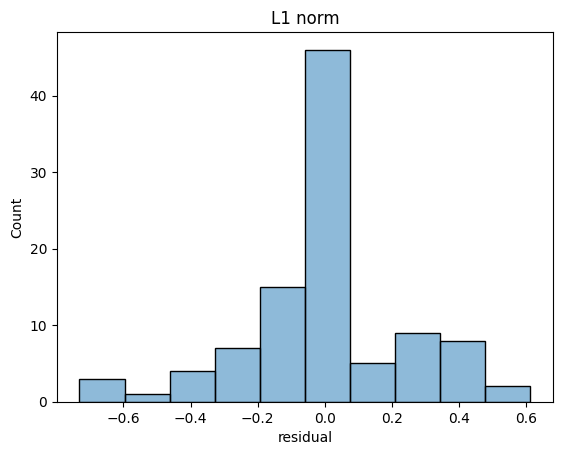

L1 norm optimal_value:
15.73364925239628


In [ ]:
x = cvx.Variable((n,1))
r = cvx.Variable((m,1))
objective = cvx.Minimize(cvx.norm(r,1))
constraints = [A@x-b==r]
problem = cvx.Problem(objective,constraints)
problem.solve()
explain_result(f"L{1} norm",problem.value,r.value)

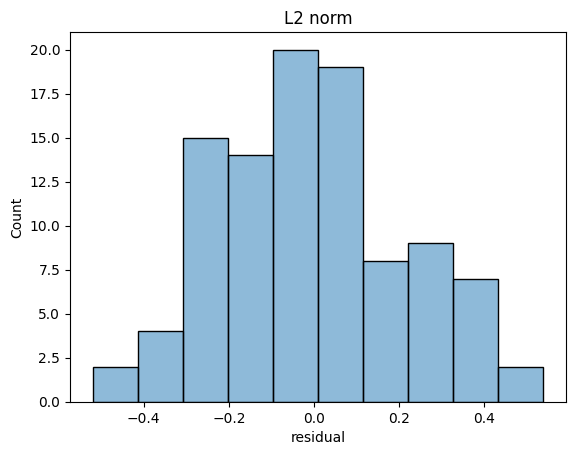

L2 norm optimal_value:
2.1633436895503118


In [ ]:
x = cvx.Variable((n,1))
r = cvx.Variable((m,1))
objective = cvx.Minimize(cvx.norm(r,2))
constraints = [A@x-b==r]
problem = cvx.Problem(objective,constraints)
problem.solve()
explain_result(f"L{2} norm",problem.value,r.value)